In [36]:
from montecarlo import Die, Game, Analyzer
import pandas as pd 
import matplotlib.pyplot as plt

# montecarlo_demo
in this demo I will show how to play the game of montecarlo from the libaray montecarlo

# Scenario 1
Creating one fair coin (with faces H and T) and one unfair coin. 
The unfair coin has one face with a weight of 5 and the others 1.

In [48]:
coin_fair = Die(['H', 'T']) #fair coin
coin_unfair1 = Die(['H', 'T']) #unfair coin
coin_unfair1.change_the_weight('H', 5) # changing the weight


/Users/arminforoughi/Documents/UVA/montecarlo.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_die['weights'][self.df_die.index[self.df_die['Faces'] == face]] = float(weight)


In [16]:
game1 = Game([coin_fair, coin_fair, coin_fair]) #creating a fair game variable 
game2 = Game([coin_unfair1, coin_unfair1, coin_fair])#creating a unfair game variable 
game1.play(1000) # playing the game 1000 times 
game2.play(1000)# playing the game 1000 times 

,1,2,3
0,H,T,T
1,H,T,T
2,H,H,H
3,T,H,H
4,T,H,T
...,...,...,...
995,T,T,T
996,H,H,H
997,H,H,H
998,H,H,T


## creating analyzer variable 

In [17]:
analyzer1 = Analyzer(game1) 
analyzer2 = Analyzer(game2)

In [23]:
print('game 1 with all the fair coins has {} out of 1000 jackpots'.format(analyzer1.jackpot()))

game 1 with all the fair coins has 259 out of 1000 jackpots


In [24]:
print('game 2 with two unfair coins has {} out of 1000 jackpots'.format(analyzer2.jackpot()))

game 2 with two unfair coins has 370 out of 1000 jackpots


In [25]:
unique1 = analyzer1.unique_df
unique2 = analyzer2.unique_df

In [33]:
print('game 1 with all the fair coins has {} heads and {} tail jackpots'.format((unique1[1] == 'H').sum(),  (unique1[1] == 'T').sum()))

game 1 with all the fair coins has 127 heads and 132 tail jackpots


In [34]:
print('game 2 with two unfair coins has {} heads and {} tail jackpots'.format((unique2[1] == 'H').sum(),  (unique2[1] == 'T').sum()))

game 2 with two unfair coins has 350 heads and 20 tail jackpots


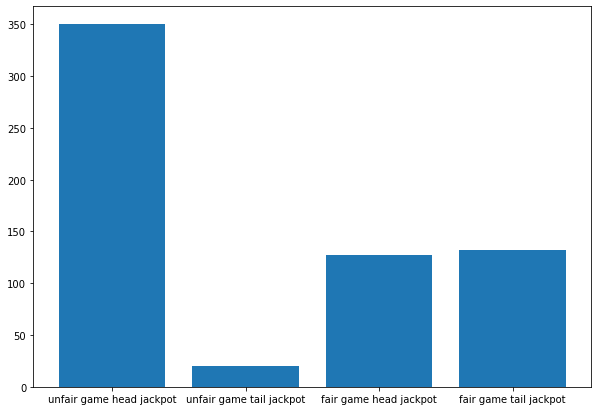

In [47]:
fig = plt.figure(figsize =(10, 7))
plt.bar(['unfair game head jackpot', 'unfair game tail jackpot', 'fair game head jackpot', 'fair game tail jackpot'],
        [(unique2[1] == 'H').sum(), (unique2[1] == 'T').sum(), (unique1[1] == 'H').sum(),  (unique1[1] == 'T').sum()])
plt.show()

the unfair game is more bias towards head and the fair game is fair

# Scenario 2
Creating a fair die and two unfair dice

all of six sides with the faces 1 through 6.

(Type 1) unfair die will weight 6 five times more than the others 

(Type 2) unfair die will weight 1 five times more than the others.

In [52]:
die_fair = Die([1,2,3,4,5,6])
die_unfair1 = Die([1,2,3,4,5,6])
die_unfair1.change_the_weight(6, 5)
die_unfair2 = Die([1,2,3,4,5,6])
die_unfair1.change_the_weight(1, 5)

In [53]:
game1 = Game([die_fair, die_fair, die_fair, die_fair, die_fair])
play1 = game1.play(10000)
game2 = Game([die_unfair1, die_unfair1, die_unfair2, die_fair])
play2 = game2.play(10000)

analyzer1 = Analyzer(game1)
analyzer2 = Analyzer(game2)




In [54]:
analyzer1.face_counts_per_roll()


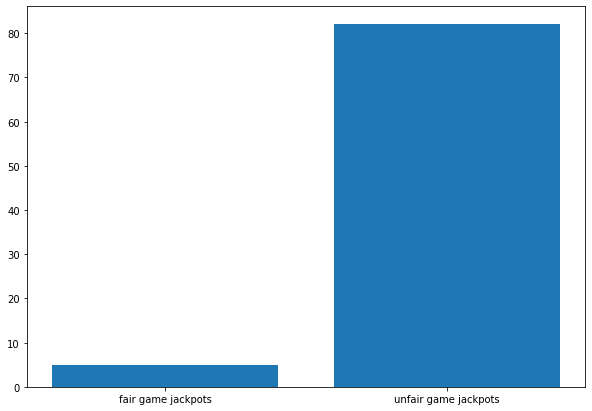

In [61]:
analyzer1.unique_df[:10]#.plot.bar()

fig = plt.figure(figsize =(10, 7))
plt.bar(['fair game jackpots', 'unfair game jackpots'],
        [analyzer1.jackpot(), analyzer2.jackpot()])
plt.show()

the unfair game had alot more jackpots than the fair game 

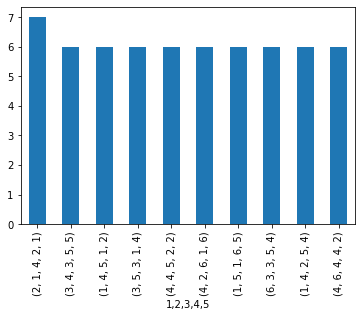

In [70]:

analyzer1.combo()
analyzer2.combo()
analyzer1.combo_df[:10].plot.bar()
plt.show()

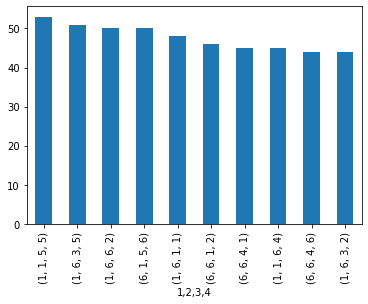

In [69]:
analyzer2.combo_df[:10].plot.bar()
plt.show()

the unfair game had alot more common combinations than the fair game 

# Scenario 3
Creating a die of letters from a to z with weights based on their frequency on the  Appendix.

In [73]:
#from the Appendix
Appendix = '''A,8.4966
B,2.0720
C,4.5388
D,3.3844
E,11.1607
F,1.8121
G,2.4705
H,3.0034
I,7.5448
J,0.1965
K,1.1016
L,5.4893
M,3.0129
N,6.6544
O,7.1635
P,3.1671
Q,0.1962
R,7.5809
S,5.7351
T,6.9509
U,3.6308
V,1.0074
W,1.2899
X,0.2902
Y,1.7779
Z,0.2722'''

def apendix_todf(df):
    a  = df.split(',')[0]
    b = df.split(',')[1]
    return pd.Series([a,b])
apendix_df = pd.Series(Appendix.split('\n')).apply(apendix_todf) # trying to turn the apendix into dataframe

In [74]:
alphabet_die = Die(apendix_df[0]) # creating a die 

chaning the weights 

In [75]:
apendix_df.apply(lambda x: alphabet_die.change_the_weight(x[0], x[1]), axis=1) #chaning the weights 
alphabet_die.show()

,Faces,weights
0,A,8.4966
1,B,2.0720
2,C,4.5388
3,D,3.3844
4,E,11.1607
5,F,1.8121
6,G,2.4705
7,H,3.0034
8,I,7.5448
9,J,0.1965


creating a game 

In [76]:
game_alphabet = Game([alphabet_die, alphabet_die, alphabet_die, alphabet_die, alphabet_die]) 
game_alphabet.play(1000)

,1,2,3,4,5
0,R,W,N,A,U
1,N,O,T,S,F
2,C,I,O,Z,S
3,M,A,R,A,B
4,A,L,L,L,S
...,...,...,...,...,...
995,A,O,B,N,E
996,P,A,B,U,T
997,I,G,G,V,O
998,C,N,U,I,H


running a sample 

In [86]:
game_alphabet.show().sample(10)

,1,2,3,4,5
348,R,C,R,H,S
138,C,D,X,L,N
790,K,B,H,T,O
442,E,T,E,U,H
314,G,A,E,C,R
485,E,R,I,G,I
412,L,M,I,G,A
730,U,S,E,G,F
509,T,U,M,P,B
149,F,I,M,T,W


after running the sample 10 times (looking at 100 words) I found 8/100 words were english